In [112]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('netflix_titles.csv')


print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [113]:
df['duration'].fillna('Unknown', inplace=True)

df['country'].fillna('Unknown', inplace=True)
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['rating'].fillna('No Rating', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)


print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [114]:
country_group = df.groupby('country')

country
United States                                                                          2818
India                                                                                   972
Unknown                                                                                 831
United Kingdom                                                                          419
Japan                                                                                   245
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Zimbabwe                                                                

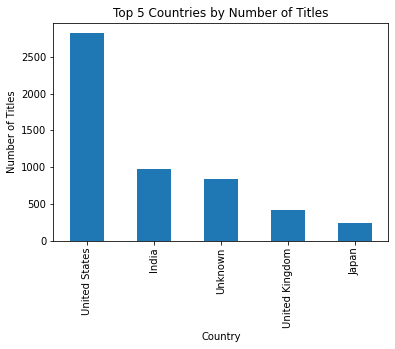

In [115]:
country_counts = df.groupby('country')['title'].count().sort_values(ascending=False)
print(country_counts)

# Selecting the top 5 countries
top_5_countries = country_counts.head(5)

# Plotting
top_5_countries.plot(kind='bar')
plt.title('Top 5 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

country
, France, Algeria                                      103.000000
Argentina                                               85.789474
Argentina, Brazil, France, Poland, Germany, Denmark     96.000000
Argentina, Chile                                        95.000000
Argentina, Chile, Peru                                 100.000000
                                                          ...    
Venezuela                                              119.000000
Venezuela, Colombia                                     82.000000
Vietnam                                                106.285714
West Germany                                           150.000000
Zimbabwe                                               100.000000
Name: duration_numeric, Length: 652, dtype: float64
country
, South Korea                               1.000000
Argentina                                   1.388889
Argentina, Spain                            1.000000
Argentina, United States, Mexico            1.0

<ipython-input-116-ac461f895307>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration_numeric'] = pd.to_numeric(movies_df['duration'].str.extract('(\d+)')[0], errors='coerce')
<ipython-input-116-ac461f895307>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['seasons_count'] = pd.to_numeric(tv_shows_df['duration'].str.extract('(\d+)')[0], errors='coerce')


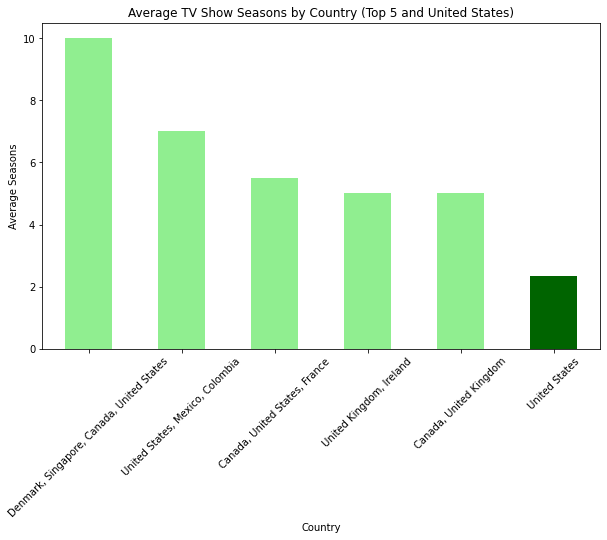

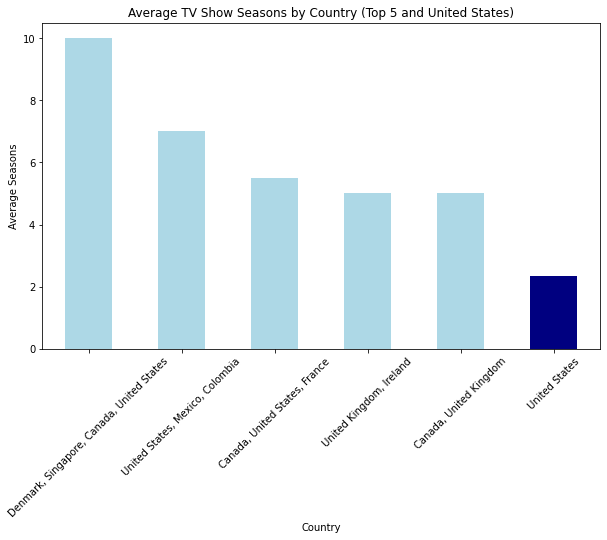

In [116]:
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

movies_df['duration_numeric'] = pd.to_numeric(movies_df['duration'].str.extract('(\d+)')[0], errors='coerce')
average_movie_duration = movies_df.groupby('country')['duration_numeric'].mean()
tv_shows_df['seasons_count'] = pd.to_numeric(tv_shows_df['duration'].str.extract('(\d+)')[0], errors='coerce')
average_tv_shows_duration = tv_shows_df.groupby('country')['seasons_count'].mean()
print(average_movie_duration)
print(average_tv_shows_duration)


us_average_movie_duration = average_movie_duration.get('United States', 'Not Available')
print("Average Movie Duration in United States:", us_average_movie_duration, "mins")

us_average_tv_shows_seasons = average_tv_shows_duration.get('United States', 'Not Available')
print("Average TV Show Seasons in United States:", us_average_tv_shows_seasons, "seasons")


# Select top 5 countries
top_5_tv_show_durations = average_tv_shows_duration.sort_values(ascending=False).head(5)

# If United States is not in the top 5, add it separately
if 'United States' not in top_5_tv_show_durations:
    us_duration = pd.Series(average_tv_shows_duration['United States'], index=['United States'])
    top_5_tv_show_durations = pd.concat([top_5_tv_show_durations, us_duration])

# Plotting
plt.figure(figsize=(10, 6))
top_5_tv_show_durations.plot(kind='bar', color=['lightgreen' if country != 'United States' else 'darkgreen' for country in top_5_tv_show_durations.index])

plt.title('Average TV Show Seasons by Country (Top 5 and United States)')
plt.xlabel('Country')
plt.ylabel('Average Seasons')
plt.xticks(rotation=45)
plt.show()


top_5_tv_shows_durations = average_tv_shows_duration.sort_values(ascending=False).head(5)

# If United States is not in the top 5, add it separately
if 'United States' not in top_5_tv_shows_durations:
    us_tv_shows_duration = pd.Series(average_tv_shows_duration.get('United States', 'Not Available'), index=['United States'])
    top_5_tv_shows_durations = pd.concat([top_5_tv_shows_durations, us_tv_shows_duration])

# Plotting
plt.figure(figsize=(10, 6))
top_5_tv_shows_durations.plot(kind='bar', color=['lightblue' if country != 'United States' else 'navy' for country in top_5_tv_shows_durations.index])

plt.title('Average TV Show Seasons by Country (Top 5 and United States)')
plt.xlabel('Country')
plt.ylabel('Average Seasons')
plt.xticks(rotation=45)
plt.show()




country        listed_in               
India          International Movies        817
               Dramas                      620
United States  Dramas                      591
               Comedies                    524
               Documentaries               411
India          Comedies                    308
United States  Independent Movies          302
               Children & Family Movies    272
               Action & Adventure          249
               TV Comedies                 234
Name: title, dtype: int64


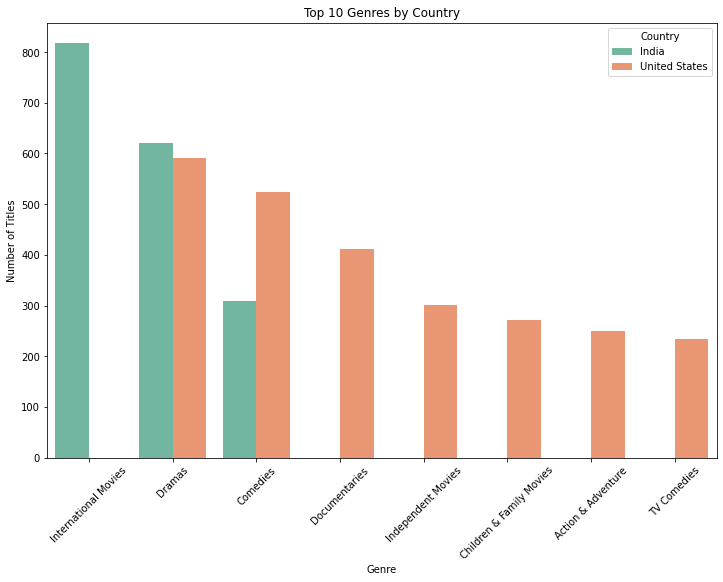

In [117]:
df['listed_in'] = df['listed_in'].astype(str).str.split(', ')

# Explode the 'listed_in' column
exploded_df = df.explode('listed_in')
genre_by_country = exploded_df.groupby(['country', 'listed_in'])['title'].count().sort_values(ascending=False)

print(genre_by_country.head(10))

top_10_genres = genre_by_country.head(10).reset_index()
plt.figure(figsize=(12, 8))

# Creating a bar plot
sns.barplot(x='listed_in', y='title', hue='country', data=top_10_genres, palette='Set2')

# Adding titles and labels
plt.title('Top 10 Genres by Country')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Country')

# Show the plot
plt.show()




release_year
2018    356
2017    352
2019    351
2020    336
2016    263
       ... 
1963      1
1962      1
1955      1
1954      1
1947      1
Name: count, Length: 69, dtype: int64


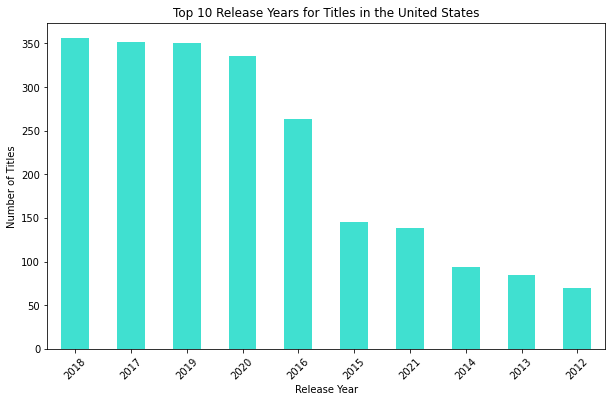

In [121]:
release_year_distribution = df.groupby('country')['release_year'].value_counts()
print(release_year_distribution.get('United States'))

us_release_years = release_year_distribution['United States']

top_ten_us_release_years = us_release_years.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_ten_us_release_years.plot(kind='bar', color='turquoise')

plt.title('Top 10 Release Years for Titles in the United States')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

In [119]:
df['cast'] = df['cast'].str.split(', ')
df['director'] = df['director'].str.split(', ')
exploded_df = df.explode('cast')
exploded_df_director = df.explode('director')

cast_trends = exploded_df.groupby('country')['cast'].value_counts()
director_trends = exploded_df_director.groupby('country')['director'].value_counts()

us_cast_trends = cast_trends['United States']
print("Top Casts in United States:")
print(us_cast_trends.head())  # This prints the top 5 casts in the United States


us_director_trends = director_trends['United States']
print("Top Directors in United States:")
print(us_director_trends.head())  # This prints the top 5 directors in the United States


Top Casts in United States:
cast
No Cast              330
Adam Sandler          20
Samuel L. Jackson     19
Fred Tatasciore       17
Molly Shannon         15
Name: count, dtype: int64
Top Directors in United States:
director
Unknown            770
Marcus Raboy        15
Jay Karas           15
Jay Chapman         12
Shannon Hartman      9
Name: count, dtype: int64
